In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import time
import matplotlib.pyplot as plt
import gzip
import urllib.request

In [79]:
# Đường dẫn đến tập dữ liệu
train_url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
local_file_train = 'kddcup.data_10_percent.gz'
# Đường dẫn đến tập dữ liệu
test_url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.testdata.unlabeled_10_percent.gz'
local_file_test = 'kddcup.testdata.unlabeled_10_percent.gz'

In [80]:
# Tên các cột trong tập dữ liệu
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Tải tập tin từ URL về địa phương
urllib.request.urlretrieve(train_url, local_file_train)
urllib.request.urlretrieve(test_url, local_file_test)

# Đọc tập dữ liệu từ tập tin đã tải về địa phương
with gzip.open(local_file_train, 'rt') as f:
    # names=col_names, nrows=1000000)  # Đọc 10000 dòng đầu tiên cho mục đích minh họa
    df = pd.read_csv(f, header=None, names=col_names, nrows=10000)
# Đọc tập dữ liệu từ tập tin đã tải về địa phương
with gzip.open(local_file_test, 'rt') as f:
    # names=col_names, nrows=500000)  # Đọc 10000 dòng đầu tiên cho mục đích minh họa
    df_test = pd.read_csv(f, header=None, names=col_names, nrows=10000)
# In ra 5 dòng đầu tiên của tập dữ liệu để kiểm tra
print(df_test.head())

   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp  private   SF        105        146     0   
1         0           udp  private   SF        105        146     0   
2         0           udp  private   SF        105        146     0   
3         0           udp  private   SF        105        146     0   
4         0           udp  private   SF        105        146     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                 254   
1               0       0    0  ...                 254   
2               0       0    0  ...                 254   
3               0       0    0  ...                 254   
4               0       0    0  ...                 254   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                    0.01   
1                     1.0                    0.01   
2                     1.0                    0.01   
3     

In [2]:
train_url = 'https://raw.githubusercontent.com/Github-303/ProjectAI_IDS_SVM_NB/main/KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/Github-303/ProjectAI_IDS_SVM_NB/main/KDD_Test.csv'
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes",
             "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
             "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
             "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
             "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
             "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
             "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
             "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
             "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]


df = pd.read_csv(train_url, header=None, names=col_names)

df_test = pd.read_csv(test_url, header=None, names=col_names)

In [3]:
print('Kích thước của tập huấn luyện:', df.shape)
print('Kích thước của tập kiểm tra:', df_test.shape)

Kích thước của tập huấn luyện: (125973, 42)
Kích thước của tập kiểm tra: (22544, 42)


In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [6]:
# Loại bỏ dấu chấm cuối từ trong cột 'label' của tập huấn luyện
df['label'] = df['label'].str.rstrip('.')

print('Phân phối nhãn trong tập huấn luyện:')
print(df['label'].value_counts())
print()
print('Phân phối nhãn trong tập kiểm tra:')
print(df_test['label'].value_counts())

Phân phối nhãn trong tập huấn luyện:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Phân phối nhãn trong tập kiểm tra:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
sn

**Bước 1: Tiền xử lý dữ liệu:**

One-Hot-Encoding được sử dụng để chuyển đổi tất cả các tính năng phân loại thành các tính năng nhị phân.

Yêu cầu của việc mã hóa one-hot là đầu vào của bộ biến đổi này phải

là một ma trận số nguyên biểu diễn các giá trị được lấy từ các tính năng phân loại (rời rạc).

Đầu ra sẽ là một ma trận thưa mỗi cột tương ứng với một giá trị có thể có.

Giả định là các tính năng đầu vào có giá trị trong khoảng [0, n_values].

Do đó, trước tiên các tính năng cần được chuyển đổi thành số bằng LabelEncoder để mỗi loại được biểu diễn bằng một số.

In [7]:
# Các cột là phân loại, nhưng chưa nhị phân: loại_giao_protocol (cột 2), dịch_vụ (cột 3), cờ (cột 4).
print('Bộ dữ liệu huấn luyện:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Đặc trưng '{col_name}' có {unique_cat} loại".format(
            col_name=col_name, unique_cat=unique_cat))

print()
print('Phân phối các loại trong dịch vụ:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Bộ dữ liệu huấn luyện:
Đặc trưng 'protocol_type' có 3 loại
Đặc trưng 'service' có 70 loại
Đặc trưng 'flag' có 11 loại
Đặc trưng 'label' có 23 loại

Phân phối các loại trong dịch vụ:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


In [8]:
# Test set
print('Bộ dữ liệu kiểm tra:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object':
        unique_cat = len(df_test[col_name].unique())
        print("Đặc trưng '{col_name}' có {unique_cat} loại".format(
            col_name=col_name, unique_cat=unique_cat))

print()
print('Phân phối các loại trong dịch vụ:')
print(df_test['service'].value_counts().sort_values(ascending=False).head())

Bộ dữ liệu kiểm tra:
Đặc trưng 'protocol_type' có 3 loại
Đặc trưng 'service' có 64 loại
Đặc trưng 'flag' có 11 loại
Đặc trưng 'label' có 38 loại

Phân phối các loại trong dịch vụ:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


**LabelEncoder**

**Chèn các đặc điểm phân loại vào một mảng numpy 2D**

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_columns = ['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [10]:
testdf_categorical_values.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [12]:

# protocol type
unique_protocol = sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service = sorted(df.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag = sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols = unique_protocol2 + unique_service2 + unique_flag2


# do it for test set
unique_service_test = sorted(df_test.service.unique())
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

**Biến đổi các đặc trưng phân loại thành số bằng cách sử dụng LabelEncoder()**

In [13]:
df_categorical_values_enc = df_categorical_values.apply(
    LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc = testdf_categorical_values.apply(
    LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


**One-Hot-Encoding**

In [14]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(
    df_categorical_values_encenc.toarray(), columns=dumcols)


# test set
testdf_categorical_values_encenc = enc.fit_transform(
    testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(
    testdf_categorical_values_encenc.toarray(), columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
testdf_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Thêm cột thiếu trong tập dữ liệu kiểm tra**

In [16]:
trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()
difference = list(set(testservice)-set(trainservice))
string = 'service_'
difference = [string + x for x in difference]
difference

[]

In [17]:
trainservice = df['service'].tolist()
testservice = df_test['service'].tolist()
difference1 = list(set(trainservice) - set(testservice))
difference1 = [string + x for x in difference1]
difference1

['service_urh_i',
 'service_harvest',
 'service_aol',
 'service_http_2784',
 'service_red_i',
 'service_http_8001']

In [18]:
for col in difference:
    df_cat_data[col] = 0
for col1 in difference1:
    testdf_cat_data[col1] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


**Thêm các cột số mới vào trong DataFrame chính**

In [19]:
# Gộp df và df_cat_data lại với nhau, chỉ giữ lại các cột mong muốn
newdf = df.merge(df_cat_data, left_index=True, right_index=True)

# Loại bỏ các cột dạng category gốc
newdf.drop(columns=categorical_columns, inplace=True)

# Làm tương tự cho dữ liệu kiểm tra
newdf_test = df_test.merge(testdf_cat_data, left_index=True, right_index=True)
newdf_test.drop(columns=categorical_columns, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


Tập dữ liệu được chia thành các tập dữ liệu riêng biệt cho từng loại tấn công.

Thẻ tấn công đã được đổi tên cho mỗi thẻ. 0=Bình thường, 1=DoS, 2=Probe, 3=R2L, 4=U2R.

Trong bộ dữ liệu mới, cột nhãn đã được thay thế bằng các giá trị mới.

Dos:

Probe:

R2L :

U2R:

In [20]:
labeldf = newdf['label']
labeldf_test = newdf_test['label']


# thay đổi cột nhãn
newlabeldf = labeldf.replace({'normal': 0, 'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1, 'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                              'ipsweep': 1, 'nmap': 1, 'portsweep': 1, 'satan': 1, 'mscan': 1, 'saint': 1,
                              'ftp_write': 1, 'guess_passwd': 1, 'imap': 1, 'multihop': 1, 'phf': 1, 'spy': 1, 'warezclient': 1, 'warezmaster': 1, 'sendmail': 1, 'named': 1, 'snmpgetattack': 1, 'snmpguess': 1, 'xlock': 1, 'xsnoop': 1, 'httptunnel': 1,
                              'buffer_overflow': 1, 'loadmodule': 1, 'perl': 1, 'rootkit': 1, 'ps': 1, 'sqlattack': 1, 'xterm': 1})
newlabeldf_test = labeldf_test.replace({'normal': 0, 'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1, 'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                                        'ipsweep': 1, 'nmap': 1, 'portsweep': 1, 'satan': 1, 'mscan': 1, 'saint': 1, 'ftp_write': 1, 'guess_passwd': 1, 'imap': 1, 'multihop': 1, 'phf': 1, 'spy': 1, 'warezclient': 1, 'warezmaster': 1, 'sendmail': 1, 'named': 1, 'snmpgetattack': 1, 'snmpguess': 1, 'xlock': 1, 'xsnoop': 1, 'httptunnel': 1,
                                        'buffer_overflow': 1, 'loadmodule': 1, 'perl': 1, 'rootkit': 1, 'ps': 1, 'sqlattack': 1, 'xterm': 1})


# đặt cột nhãn mới trở lại
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [21]:
newdf.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
newdf_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_harvest,service_aol,service_http_2784,service_red_i,service_http_8001
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


**Bước 2: Chuẩn hóa đặc trưng**

In [23]:
# Chia các khung dữ liệu thành X & Y
# Thuộc tính X, biến kết quả Y
X_Df = newdf.drop('label', axis=1)
Y_Df = newdf.label

# test set
X_Df_test = newdf_test.drop('label', axis=1)
Y_Df_test = newdf_test.label

**Cột sẽ được loại bỏ ở bước này, vì vậy sẽ lưu lại tên cột để sử dụng sau này.**

In [24]:
colNames = list(X_Df)
colNames_test = list(X_Df_test)

In [115]:
X_Df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,8,105,145,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_Df_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_harvest,service_aol,service_http_2784,service_red_i,service_http_8001
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
22540,0,317,938,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
22542,0,42,42,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0


In [26]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_Df)
X_Df = scaler1.transform(X_Df)

# test data
scaler5 = preprocessing.StandardScaler().fit(X_Df_test)
X_Df_test = scaler5.transform(X_Df_test)

In [27]:
X_Df_test

array([[-0.15553409, -0.02198811, -0.09689597, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15553409, -0.02198811, -0.09689597, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15411277,  0.0054731 , -0.09689597, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.15553409,  0.09337309,  0.29492588, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15553409, -0.02189927, -0.0949166 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15553409, -0.02198811, -0.09689597, ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
X_Df

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00776224, -0.00491864, ..., -0.01972622,
        -1.21190076, -0.04643159],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.01972622,
         0.82515007, -0.04643159],
       [-0.11024922, -0.00776224, -0.00491864, ..., -0.01972622,
        -1.21190076, -0.04643159],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.01972622,
         0.82515007, -0.04643159]])

In [29]:
print(X_Df.shape)

(125973, 122)


In [30]:
print(X_Df_test.shape)

(22544, 122)


#   

# SVM

In [31]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [32]:
clf_SVM_Df = SVC(kernel='linear', C=1.0, random_state=0)
train0 = time.time()
clf_SVM_Df.fit(X_Df, Y_Df.astype(int))
train1 = time.time() - train0

In [33]:
test0 = time.time()

Y_Df_pred = clf_SVM_Df.predict(X_Df_test)
test1 = time.time() - test0

# Tạo ma trận lỗi
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,8399,1312
1,3318,9515


In [34]:
accuracy1 = cross_val_score(clf_SVM_Df, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy1.mean(), accuracy1.std() * 2))
precision1 = cross_val_score(clf_SVM_Df, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision1.mean(), precision1.std() * 2))
recall1 = cross_val_score(clf_SVM_Df, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall1.mean(), recall1.std() * 2))
f = cross_val_score(clf_SVM_Df, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train1)
print("Thời gian kiểm tra:%.3fs\n" % test1)

Độ chính xác: 0.95981 (+/- 0.00430)
Độ chính xác của dự đoán tích cực: 0.94743 (+/- 0.00726)
Tỷ lệ nhớ lại: 0.98403 (+/- 0.00604)
F-measure: 0.96537 (+/- 0.00364)
Thời gian huấn luyện:590.621s

Thời gian kiểm tra:11.318s



In [35]:
clf_SVM_Df1 = SVC(kernel='rbf', C=1.0, random_state=0)
train2 = time.time()
clf_SVM_Df1.fit(X_Df, Y_Df.astype(int))
train3 = time.time() - train2

In [36]:
test2 = time.time()
Y_Df_pred = clf_SVM_Df1.predict(X_Df_test)
test3 = time.time() - test2

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,8836,875
1,4164,8669


In [37]:
accuracy3 = cross_val_score(clf_SVM_Df1, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy3.mean(), accuracy3.std() * 2))
precision3 = cross_val_score(clf_SVM_Df1, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision3.mean(), precision3.std() * 2))
recall3 = cross_val_score(clf_SVM_Df1, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall3.mean(), recall3.std() * 2))
f = cross_val_score(clf_SVM_Df1, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train3)
print("Thời gian kiểm tra:%.3fs\n" % test3)

Độ chính xác: 0.96842 (+/- 0.00722)
Độ chính xác của dự đoán tích cực: 0.95891 (+/- 0.00982)
Tỷ lệ nhớ lại: 0.98683 (+/- 0.00625)
F-measure: 0.97266 (+/- 0.00618)
Thời gian huấn luyện:166.176s

Thời gian kiểm tra:17.078s



In [38]:
clf_SVM_Df2 = SVC(kernel='poly', C=1.0, random_state=0)
train4 = time.time()
clf_SVM_Df2.fit(X_Df, Y_Df.astype(int))
train5 = time.time() - train4

In [39]:
test4 = time.time()
Y_Df_pred = clf_SVM_Df2.predict(X_Df_test)
test5 = time.time() - test4

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,9407,304
1,8911,3922


In [40]:
accuracy5 = cross_val_score(clf_SVM_Df2, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy5.mean(), accuracy5.std() * 2))
precision5 = cross_val_score(clf_SVM_Df2, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision5.mean(), precision5.std() * 2))
recall5 = cross_val_score(clf_SVM_Df2, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall5.mean(), recall5.std() * 2))
f = cross_val_score(clf_SVM_Df2, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train5)
print("Thời gian kiểm tra:%.3fs\n" % test5)

Độ chính xác: 0.95103 (+/- 0.00651)
Độ chính xác của dự đoán tích cực: 0.96023 (+/- 0.00515)
Tỷ lệ nhớ lại: 0.95348 (+/- 0.01265)
F-measure: 0.95683 (+/- 0.00600)
Thời gian huấn luyện:182.072s

Thời gian kiểm tra:10.565s



In [41]:
clf_SVM_Df3 = SVC(kernel='sigmoid', C=1.0, random_state=0)
train6 = time.time()
clf_SVM_Df3.fit(X_Df, Y_Df.astype(int))
train7 = time.time() - train6

In [42]:
test6 = time.time()
Y_Df_pred = clf_SVM_Df3.predict(X_Df_test)
test7 = time.time() - test6

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,6327,3384
1,3445,9388


In [43]:
accuracy7 = cross_val_score(clf_SVM_Df3, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy7.mean(), accuracy7.std() * 2))
precision7 = cross_val_score(clf_SVM_Df3, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision7.mean(), precision7.std() * 2))
recall7 = cross_val_score(clf_SVM_Df3, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall7.mean(), recall7.std() * 2))
f = cross_val_score(clf_SVM_Df3, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train7)
print("Thời gian kiểm tra:%.3fs\n" % test7)

Độ chính xác: 0.93914 (+/- 0.01070)
Độ chính xác của dự đoán tích cực: 0.93035 (+/- 0.01158)
Tỷ lệ nhớ lại: 0.96540 (+/- 0.01425)
F-measure: 0.94753 (+/- 0.00932)
Thời gian huấn luyện:340.619s

Thời gian kiểm tra:19.929s



# Naive Bayes

In [44]:
import time
from sklearn.naive_bayes import GaussianNB

In [45]:
# Tạo đối tượng phân loại GaussianNB
clf_Naive = GaussianNB()
train8 = time.time()
# Đào tạo trình phân loại GaussianNB
clf_Naive = clf_Naive.fit(X_Df, Y_Df.astype(int))
train9 = time.time() - train8

In [46]:
test8 = time.time()
Y_Df_pred=clf_Naive.predict(X_Df_test)
test9 = time.time() - test8

# Tạo ma trận lỗi
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=[
            'Các tấn công thực tế'], colnames=['Tấn công được dự đoán'])

Tấn công được dự đoán,0,1
Các tấn công thực tế,,
0,8,9703
1,949,11884


In [47]:
accuracy9 = cross_val_score(clf_Naive, X_Df_test,
                           Y_Df_test, cv=10, scoring='accuracy')
print("Độ chính xác: %0.5f (+/- %0.5f)" %
      (accuracy9.mean(), accuracy9.std() * 2))
precision9 = cross_val_score(clf_Naive, X_Df_test,
                            Y_Df_test, cv=10, scoring='precision')
print("Độ chính xác của dự đoán tích cực: %0.5f (+/- %0.5f)" %
      (precision9.mean(), precision9.std() * 2))
recall9 = cross_val_score(clf_Naive, X_Df_test,
                         Y_Df_test, cv=10, scoring='recall')
print("Tỷ lệ nhớ lại: %0.5f (+/- %0.5f)" % (recall9.mean(), recall9.std() * 2))
f = cross_val_score(clf_Naive, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Thời gian huấn luyện:%.3fs\n" % train9)
print("Thời gian kiểm tra:%.3fs\n" % test9)

Độ chính xác: 0.66687 (+/- 0.02374)
Độ chính xác của dự đoán tích cực: 0.99223 (+/- 0.00921)
Tỷ lệ nhớ lại: 0.41814 (+/- 0.04447)
F-measure: 0.58795 (+/- 0.04347)
Thời gian huấn luyện:0.411s

Thời gian kiểm tra:0.100s



**So sánh Thời gian Huấn luyện, Thời gian Kiểm tra, Độ chính xác, Độ chính xác Thực tế, và Tỷ lệ nhớ lại cho các nhân SVM khác nhau và Naive Bayes**

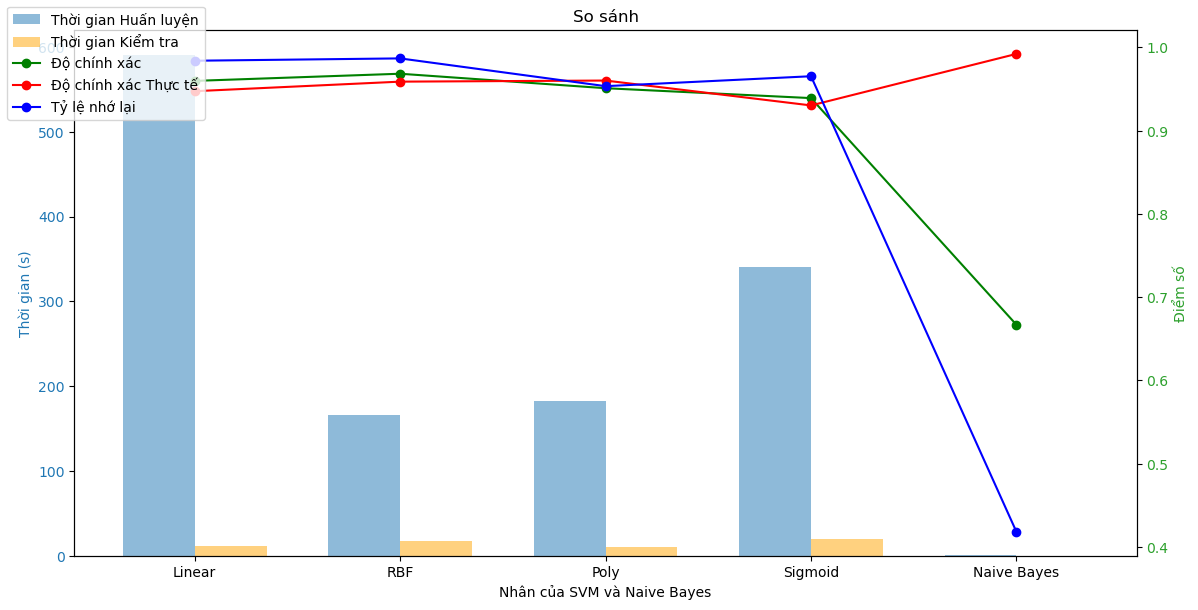

In [48]:
# Thời gian huấn luyện và thời gian kiểm tra của từng mô hình
train_times = [train1, train3, train5, train7, train9]
test_times = [test1, test3, test5, test7, test9]

# Tên của các mô hình
model_names = ['Linear', 'RBF', 'Poly', 'Sigmoid', 'Naive Bayes']

# Vẽ biểu đồ
x = np.arange(len(model_names))  # Vị trí của các nhóm
width = 0.35  # Độ rộng của cột

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Nhân của SVM và Naive Bayes')
ax1.set_ylabel('Thời gian (s)', color=color)
ax1.bar(x - width/2, train_times, width,
        color=color, alpha=0.5, label='Thời gian Huấn luyện')
ax1.bar(x + width/2, test_times, width,
        color='orange', alpha=0.5, label='Thời gian Kiểm tra')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Điểm số', color=color)
# Độ chính xác tổng quát của từng mô hình
accuracies = [accuracy1.mean(), accuracy3.mean(),
              accuracy5.mean(), accuracy7.mean(),accuracy9.mean()]
# Độ chính xác thực tế của từng mô hình
precisions = [precision1.mean(), precision3.mean(),
              precision5.mean(), precision7.mean(), precision9.mean()]
# Tỷ lệ nhớ lại của từng mô hình
recalls = [recall1.mean(), recall3.mean(),
           recall5.mean(), recall7.mean(), recall9.mean()]

ax2.plot(x, accuracies, color='green', marker='o', label='Độ chính xác')
ax2.plot(x, precisions, color='red', marker='o', label='Độ chính xác Thực tế')
ax2.plot(x, recalls, color='blue', marker='o', label='Tỷ lệ nhớ lại')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left')
plt.title('So sánh')
plt.xticks(x, model_names)
plt.show()